<a href="https://colab.research.google.com/github/Steve-YJ/Assignment_Standalone_DL/blob/master/%5BDo_it%5D_Simple_Pipeline_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple model works fine
* Reference:https://www.kaggle.com/choonje/simple-model-works-fine

* 1. 모델 학습을 위한 간단한 파이프라인 만들기(언제.어디서든 적용가능한 파이프라인!)
* 2. Train, Test Data Preprocessing, Feature Engineering
* 3. Modeling & Test Submission

# Set environment

In [1]:
%load_ext autoreload
%autoreload 2

Mount drive

In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
%cd drive/My\ Drive/Kaggle-DataScience/Explore-Kernels/data

/content/drive/My Drive/Kaggle-DataScience/Explore-Kernels/data


In [4]:
! ls

archive.csv  sample_submission.csv		  test.csv
cat_dog      starbucks_drinkMenu_expanded.csv	  titanic
cereal.csv   starbucks-menu-nutrition-drinks.csv  train.csv
mnist_png    starbucks-menu-nutrition-food.csv


# Import Library

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder  # Encode target labels with value between 0 and n_classes-1
from sklearn.model_selection import train_test_split  # Split arrays or matrics into randon train and test subsets

from sklearn.model_selection import cross_val_score  # Evaluate a score by croee-validation

## Data Preparation

In [103]:
train = pd.read_csv('./titanic/train.csv')
test_val = pd.read_csv('./titanic/test.csv')

train.shape, test_val.shape

((891, 12), (418, 11))

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# test_val.head()

In [9]:
train.dtypes # pd.dtypes: Return the dtypes in the DataFrame.

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
test_val.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Numeric_feature로 분류를 해보자

In [13]:
numeric_feats = train.dtypes[train.dtypes != 'object'].index
numeric_feats

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

Draw heatmap of numeric features

In [14]:
train_corr = train.loc[:, numeric_feats].corr()

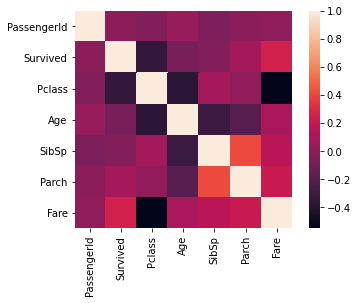

In [15]:
import seaborn as sns  # Plot rectangular data as a color-encoded matrix.
ax = sns.heatmap(train_corr, square=True)

* numeric feature를 정규화해준다? => 해보기 전과 해본 후 비교
* train, test 모두 적용 => 이거 전문이죠

## Data Preprocessing

In [43]:
# 1st. all_data
# train set과 test set을 합쳐준다

# 그 전에 train_data로부터 label정보를 제거해준다
train = train.drop(['Survived'], axis=1)
print(train.shape)

all_data = pd.concat((train, test_val))
print(all_data.shape)

(891, 11)
(1309, 11)


In [62]:
# all_data.tail()

In [63]:
all_data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         263
SibSp         0
Parch         0
Ticket        0
Fare          1
Embarked      2
dtype: int64

In [46]:
# drop passengerId, Cabin
all_data = all_data.drop(['PassengerId', 'Cabin'], axis=1)
# all_data.columns
all_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [47]:
all_data.iloc[800:]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
800,2,"Ponesell, Mr. Martin",male,34.00,0,0,250647,13.0000,S
801,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.00,1,1,C.A. 31921,26.2500,S
802,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.0000,S
803,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,C
804,3,"Hedman, Mr. Oskar Arvid",male,27.00,0,0,347089,6.9750,S
...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.9000,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.2500,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


## Feature Engineering
* preprocessing 'Name'
* Null value handling: 'Age', 'Fare', 'Embarked'
* 'Ticket' : preprocessing => drop

* Feature Scaling?!

### F.E 1. preprocessing 'Name'

In [48]:
all_data.Name = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
all_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,S
1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C
2,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,Mrs,female,35.0,1,0,113803,53.1000,S
4,3,Mr,male,35.0,0,0,373450,8.0500,S


In [49]:
print(all_data.Name.unique())
print()
print("len: ", len(all_data.Name.unique()))

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']

len:  18


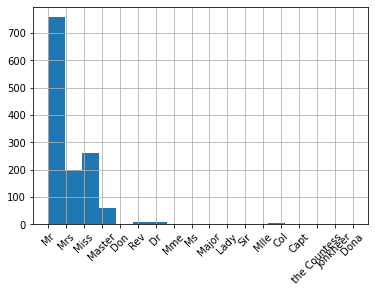

In [50]:
all_data.Name.hist(xrot=45, bins=18)

'Mr', 'Mrs', 'Miss', 'Master'를 제외한 나머지 이름을 'Mr', 'Mrs', 'Miss', 'Master'의 네 존칭으로 변환해준다

In [57]:
Mr = ['Don', 'Dr', 'Major', 'Sir', 'Col','Capt' 'the Countess', 'Jonkheer']
Miss  = ['Ms', 'Lady', 'Mlle']
Mrs = ['Rev', 'Mme', 'Dona']

for i in range(len(all_data)):
    temp = all_data.iloc[i, 1]
    if temp in Mr:
        all_data.iloc[i, 1] = 'Mr'
        # print(all_data.iloc[i, 1])
    elif temp in Miss:
        all_data.iloc[i, 1] = 'Miss'
    elif temp in Mrs:
        all_data.iloc[i, 1] = 'Mrs'
    elif temp == 'Capt':
        all_data.iloc[i, 1] = 'Mr'
    elif temp == 'the Countess':
        all_data.iloc[i, 1] = 'Mr'

In [58]:
all_data.Name.unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

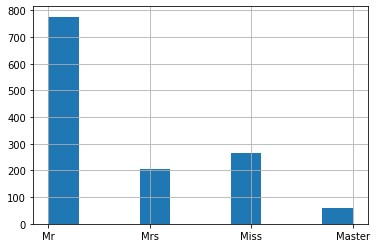

In [59]:
all_data.Name.hist()

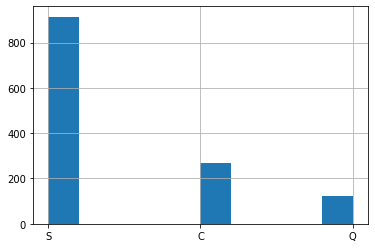

In [64]:
all_data.Embarked.hist()

### F.E 2. Null value handling
* 'Age', 'Fare', 'Embarked'

In [68]:
age_mean = all_data.Age.mean()
age_mean

29.881137667304014

In [72]:
all_data.Age.fillna(age_mean, inplace=True)
print(all_data.isnull().sum())

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        1
Embarked    2
dtype: int64


* 'Fare': 'Age' Feature와 마찬가지로 전처리

In [77]:
all_data.Fare.fillna(all_data.Fare.mean(), inplace=True)
all_data.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

* 'Embarked': 가장 많은 값을 넣어준다

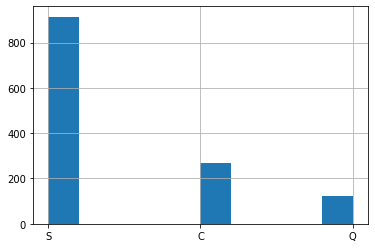

In [79]:
all_data.Embarked.hist()

In [81]:
all_data.Embarked.fillna('S', inplace=True)
all_data.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

이로서 Null값을 모두 채워주었다

### F.E 3. drop 'Ticket'

In [83]:
all_data.drop('Ticket', axis=1, inplace=True)
all_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,Mr,male,22.0,1,0,7.2500,S
1,1,Mrs,female,38.0,1,0,71.2833,C
2,3,Miss,female,26.0,0,0,7.9250,S
3,1,Mrs,female,35.0,1,0,53.1000,S
4,3,Mr,male,35.0,0,0,8.0500,S


## Next
* catecorical value Encoding
* Feature Scaling

In [89]:
all_data.dtypes

Pclass        int64
Name          int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

'Name', 'Sex', 'Embarked' feature를 전처리해준다

1. Name

In [84]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  # 객체 생성
le.fit(all_data.Name)
le.classes_

array(['Master', 'Miss', 'Mr', 'Mrs'], dtype=object)

In [87]:
all_data.Name = le.transform(all_data.Name)

In [88]:
all_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,2,male,22.0,1,0,7.2500,S
1,1,3,female,38.0,1,0,71.2833,C
2,3,1,female,26.0,0,0,7.9250,S
3,1,3,female,35.0,1,0,53.1000,S
4,3,2,male,35.0,0,0,8.0500,S


2. Sex

In [91]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(all_data.Sex)
le.classes_

array(['female', 'male'], dtype=object)

In [92]:
all_data.Sex = le.transform(all_data.Sex)
all_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,2,1,22.0,1,0,7.2500,S
1,1,3,0,38.0,1,0,71.2833,C
2,3,1,0,26.0,0,0,7.9250,S
3,1,3,0,35.0,1,0,53.1000,S
4,3,2,1,35.0,0,0,8.0500,S


3. Embarked

In [93]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(all_data.Embarked)
le.classes_

array(['C', 'Q', 'S'], dtype=object)

In [94]:
all_data.Embarked = le.transform(all_data.Embarked)

In [95]:
all_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,2,1,22.0,1,0,7.2500,2
1,1,3,0,38.0,1,0,71.2833,0
2,3,1,0,26.0,0,0,7.9250,2
3,1,3,0,35.0,1,0,53.1000,2
4,3,2,1,35.0,0,0,8.0500,2


### StandardScaler
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

In [96]:
test_all = all_data

In [97]:
from sklearn.preprocessing import StandardScaler
data = test_all
scaler = StandardScaler()
print(scaler.fit(data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [98]:
print(scaler.transform(data))

[[ 0.84191642  0.18922811  0.74349692 ... -0.4449995  -0.50359486
   0.62227932]
 [-1.54609786  1.56533697 -1.34499549 ... -0.4449995   0.73450256
  -1.83492621]
 [ 0.84191642 -1.18688075 -1.34499549 ... -0.4449995  -0.49054359
   0.62227932]
 ...
 [ 0.84191642  0.18922811  0.74349692 ... -0.4449995  -0.50359486
   0.62227932]
 [ 0.84191642  0.18922811  0.74349692 ... -0.4449995  -0.48812669
   0.62227932]
 [ 0.84191642 -2.56298961  0.74349692 ...  0.71076309 -0.21147268
  -1.83492621]]


In [99]:
test_data = scaler.transform(data)

In [102]:
test_data.shape

(1309, 8)

## Test Machine Learning

In [104]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
y = train.Survived

In [107]:
X = test_data[:891]
X.shape

(891, 8)

train_test_split

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

voting classifier

In [110]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

# iris = datasets.load_iris()
# X, y = iris.data[:, 1:3], iris.target
X, y = X_train, y_train

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(
     estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
     voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
     scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
     print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.79 (+/- 0.04) [Logistic Regression]
Accuracy: 0.82 (+/- 0.03) [Random Forest]
Accuracy: 0.82 (+/- 0.03) [naive Bayes]
Accuracy: 0.83 (+/- 0.02) [Ensemble]


In [111]:
eclf.predict(X_test)

NotFittedError: ignored